In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [3]:
os.chdir(r'C:\Users\sl456\Dropbox (HMS)\zKyunKyun_storage\TCGA\Metabric_2012Nature\python\ExpressionAnalysis_PIK3CAmNF1w_PIK3CAmNF1m')

In [4]:
# read csv file

df = pd.read_csv('TumorID_PIK3CAmAny_NF1.csv')
df_survival = pd.read_csv('2509tumor_clinical_kyun.csv')

In [5]:
df_survival

,Patient ID,Sample ID,Nottingham prognostic index,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Cohort,ER Status,ER status measured by IHC,...,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Cancer Studies,Sample Type,Tumor Other Histologic Subtype,Tumor Size,Tumor Stage,Type of Breast Surgery
0,MB-0002,MB-0002,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Living,r,YES,brca_metabric,Primary,IDC,10.0,1.0,BREAST CONSERVING
1,MB-0005,MB-0005,4.030,Breast Cancer,Breast Invasive Ductal Carcinoma,high,YES,1.0,+,pos,...,NaN,Died of Disease,r,NO,brca_metabric,Primary,IDC,15.0,2.0,MASTECTOMY
2,MB-0006,MB-0006,4.050,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,25.0,2.0,MASTECTOMY
3,MB-0010,MB-0010,4.062,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,31.0,4.0,MASTECTOMY
4,MB-0014,MB-0014,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,10.0,2.0,BREAST CONSERVING
5,MB-0020,MB-0020,6.130,Breast Cancer,Invasive Breast Carcinoma,high,YES,1.0,-,neg,...,ER-/HER2-,Died of Disease,l,YES,brca_metabric,Primary,ILC,65.0,3.0,MASTECTOMY
6,MB-0022,MB-0022,4.058,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,moderate,NO,1.0,+,pos,...,NaN,Died of Other Causes,l,YES,brca_metabric,Primary,IDC+ILC,29.0,2.0,BREAST CONSERVING
7,MB-0667,MB-0667,6.068,Breast Cancer,Invasive Breast Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,34.0,2.0,BREAST CONSERVING
8,MB-0028,MB-0028,5.032,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Other Causes,r,YES,brca_metabric,Primary,IDC,16.0,2.0,BREAST CONSERVING
9,MB-0035,MB-0035,3.056,Breast Cancer,Breast Invasive Lobular Carcinoma,high,NO,1.0,+,neg,...,ER+/HER2- High Prolif,Died of Disease,l,NO,brca_metabric,Primary,ILC,28.0,2.0,MASTECTOMY


In [6]:
MM = df.loc[df['Group']=='MM']
WM = df.loc[df['Group']=='WM']

In [7]:
MM.head()

,Study ID,Sample ID,Patient ID,Altered,NF1: MUT HETLOSS HOMDEL;,PIK3CA: MUT;,Group,HvsK
4,brca_metabric,MB-0580,MB-0580,1,CNA: HETLOSS;,MUT: C420R;,MM,NaN
5,brca_metabric,MB-0613,MB-0613,1,CNA: HETLOSS;,MUT: C420R;,MM,NaN
6,brca_metabric,MB-0666,MB-0666,1,CNA: HETLOSS;,MUT: C420R;,MM,NaN
7,brca_metabric,MB-3396,MB-3396,1,CNA: HETLOSS;,MUT: C420R;,MM,NaN
8,brca_metabric,MB-2744,MB-2744,1,CNA: HETLOSS;,MUT: C420R;,MM,NaN


In [8]:
df_survival.index = df_survival['Sample ID']

In [9]:
df_survival

,Patient ID,Sample ID,Nottingham prognostic index,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Cohort,ER Status,ER status measured by IHC,...,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Cancer Studies,Sample Type,Tumor Other Histologic Subtype,Tumor Size,Tumor Stage,Type of Breast Surgery
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0002,MB-0002,MB-0002,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Living,r,YES,brca_metabric,Primary,IDC,10.0,1.0,BREAST CONSERVING
MB-0005,MB-0005,MB-0005,4.030,Breast Cancer,Breast Invasive Ductal Carcinoma,high,YES,1.0,+,pos,...,NaN,Died of Disease,r,NO,brca_metabric,Primary,IDC,15.0,2.0,MASTECTOMY
MB-0006,MB-0006,MB-0006,4.050,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,25.0,2.0,MASTECTOMY
MB-0010,MB-0010,MB-0010,4.062,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,31.0,4.0,MASTECTOMY
MB-0014,MB-0014,MB-0014,4.020,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,YES,1.0,+,pos,...,NaN,Living,r,YES,brca_metabric,Primary,IDC,10.0,2.0,BREAST CONSERVING
MB-0020,MB-0020,MB-0020,6.130,Breast Cancer,Invasive Breast Carcinoma,high,YES,1.0,-,neg,...,ER-/HER2-,Died of Disease,l,YES,brca_metabric,Primary,ILC,65.0,3.0,MASTECTOMY
MB-0022,MB-0022,MB-0022,4.058,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,moderate,NO,1.0,+,pos,...,NaN,Died of Other Causes,l,YES,brca_metabric,Primary,IDC+ILC,29.0,2.0,BREAST CONSERVING
MB-0667,MB-0667,MB-0667,6.068,Breast Cancer,Invasive Breast Carcinoma,high,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Disease,l,YES,brca_metabric,Primary,IDC,34.0,2.0,BREAST CONSERVING
MB-0028,MB-0028,MB-0028,5.032,Breast Cancer,Breast Invasive Ductal Carcinoma,moderate,NO,1.0,+,pos,...,ER+/HER2- High Prolif,Died of Other Causes,r,YES,brca_metabric,Primary,IDC,16.0,2.0,BREAST CONSERVING


In [10]:
MM_survival = df_survival.loc[df_survival['Sample ID'].isin(MM['Sample ID'])]
WM_survival = df_survival.loc[df_survival['Sample ID'].isin(WM['Sample ID'])]

In [11]:
print(shape(MM))
print(shape(WM))

print(shape(MM_survival))
print(shape(WM_survival))

(227, 8)
(750, 8)
(227, 32)
(750, 32)


In [12]:
MM_survival['Group'] = 'MM'
WM_survival['Group'] = 'WM'

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
DF1 = pd.concat([MM_survival, WM_survival], axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [14]:
DF1.shape

(977, 33)

In [15]:
#DF2 = DF1.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
DF2 = DF1

In [16]:
DF2.columns

Index(['Patient ID', 'Sample ID', 'Nottingham prognostic index', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Cohort',
       'ER Status', 'ER status measured by IHC', 'HER2 Status',
       'HER2 status measured by SNP6', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Neoplasm Histologic Grade', 'Age at Diagnosis', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Pam50 + Claudin-low subtype', '3-Gene classifier subtype',
       'Patient's Vital Status', 'Primary Tumor Laterality', 'Radio Therapy',
       'Cancer Studies', 'Sample Type', 'Tumor Other Histologic Subtype',
       'Tumor Size', 'Tumor Stage', 'Type of Breast Surgery', 'Group'],
      dtype='object')

In [17]:
DF2['Sample ID'] = DF1['Sample ID']
DF2['Group'] = DF1['Group']

In [63]:
MM_result = DF2[((DF2['Group'] =='MM') & (DF2['ER Status'] == '+'))   ]
WM_result = DF2[((DF2['Group'] =='WM') & (DF2['ER Status'] == '+')) ]

In [65]:
WM_result.shape

(534, 33)

In [66]:
MM_month = MM_result['Overall Survival (Months)']
WM_month = WM_result['Overall Survival (Months)']

In [67]:
MM_month

Sample ID
MB-0010      7.800000
MB-0014    164.333333
MB-0022     99.533333
MB-0035     36.266667
MB-0083     86.066667
MB-0093    153.200000
MB-0101    148.033333
MB-0128    137.800000
MB-0136     88.200000
MB-0165     47.633333
MB-0172    138.100000
MB-0194     91.600000
MB-0393     20.833333
MB-0256    200.700000
MB-0306     42.966667
MB-0308    183.266667
MB-0373     27.000000
MB-0379    135.666667
MB-0382    136.466667
MB-0388     97.566667
MB-0877     14.433333
MB-0891    149.400000
MB-0897     30.966667
MB-0904    144.700000
MB-0410     63.000000
MB-0207    173.633333
MB-0215    122.200000
MB-0425     24.400000
MB-0434     45.500000
MB-0496    130.900000
              ...    
MB-7097     65.166667
MB-5521    124.800000
MB-5543     34.433333
MB-7150    128.966667
MB-7212     52.500000
MB-7230    182.600000
MB-7235    170.800000
MB-7238     23.266667
MB-6039     73.133333
MB-7283     28.866667
MB-7289    126.666667
MB-6107    123.333333
MB-6116    193.133333
MB-6150     77.666667


In [69]:
print(len(MM_result))
print(len(WM_result))

156
534


In [70]:
MM_mon = MM_month.dropna()
WM_mon = WM_month.dropna()

In [71]:
print(len(MM_mon))
len(WM_mon)

156


534

In [72]:
print(median(MM_mon))
print(median(WM_mon))

110.43333335
120.66666665


In [73]:
MM_mon.to_csv('MM_ERpos.csv') 
WM_mon.to_csv('WM_ERpos.csv') 

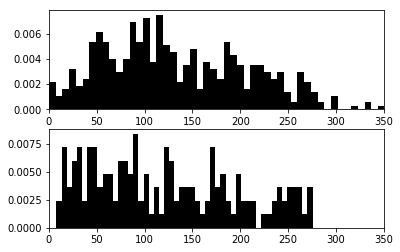

In [74]:
# histogram


plt.figure

ax = plt.subplot(2,1,1)
ax.hist(WM_mon, bins=50, orientation="vertical", color='k', density=True, stacked=True);
xlim(0, 350)
ax = plt.subplot(2,1,2)
ax.hist(MM_mon, bins=50, orientation="vertical", color='k', density=True, stacked=True);
xlim(0, 350)

plt.show()

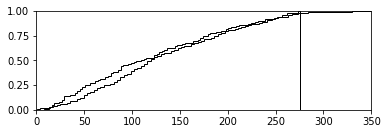

In [75]:
# histogram


plt.figure

ax = plt.subplot(2,1,1)
ax.hist(WM_mon, bins=100, orientation="vertical", color='k', density=True, stacked=True, cumulative=True, histtype='step');
xlim(0, 350)
#ax = plt.subplot(2,1,2)
ax.hist(MM_mon, bins=100, orientation="vertical", color='k', density=True, stacked=True, cumulative=True, histtype='step');
xlim(0, 350)
ylim(0, 1)

plt.show()

# Stop! 
# PCA

In [36]:
# Separating out the features
x = DF2.iloc[:, :-2].values

In [37]:
x

array([['MB-0010', 'MB-0010', 4.062, ..., 'IDC', 31.0, 4.0],
       ['MB-0014', 'MB-0014', 4.02, ..., 'IDC', 10.0, 2.0],
       ['MB-0022', 'MB-0022', 4.058, ..., 'IDC+ILC', 29.0, 2.0],
       ..., 
       ['MTS-T2429', 'MTS-T2429', nan, ..., nan, nan, nan],
       ['MTS-T2430', 'MTS-T2430', nan, ..., nan, nan, nan],
       ['MTS-T2431', 'MTS-T2431', nan, ..., nan, nan, nan]], dtype=object)

In [38]:
# Separating out the target
y = DF2.loc[:,['Sample ID']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x=x

ValueError: could not convert string to float: 'IDC'

In [20]:
x

array([[-0.07729237, -0.4046735 , -1.28097176, ..., -0.40736636,
         0.47900717, -0.01493924],
       [-2.33437614,  0.12965041,  0.59021283, ..., -0.1052949 ,
         1.50438644, -0.04066821],
       [-2.0255915 , -0.59528378,  0.24215353, ..., -1.75764475,
         2.12275515, -2.22247927],
       ..., 
       [ 1.06683921,  1.54639212,  0.87117247, ..., -0.57468221,
         0.21663902,  1.16261808],
       [-0.08695668,  0.70178569, -0.61216969, ...,  0.97236722,
         0.75534554,  0.12541271],
       [-1.39761707,  0.67505333,  0.92662145, ...,  2.89802816,
         0.5089734 ,  1.50741028]])

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(x)

In [22]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 
                          'PC3', 'PC4', 
                          'PC5', 'PC6', 
                          'PC7', 'PC8', 
                          'PC9', 'PC10' ])

principalDf.index = DF2.index

In [23]:
finalDf = pd.concat([principalDf, DF2['Group']], axis = 1)

eigenvalues = pca.explained_variance_

In [24]:
eigenvalues

array([ 1733.08333993,   906.30433673,   783.49726413,   620.7924705 ,
         505.53873194,   414.52922745,   338.00341639,   311.15537377,
         271.08408635,   258.48775194])

In [25]:
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Group
MB-0891,-21.049497,-12.526073,-35.702917,9.241627,8.752450,0.920335,-0.833150,-25.313195,6.718085,-3.675913,MM
MB-0434,-9.057770,10.778694,38.660157,-64.117036,14.680491,10.355259,16.772104,-13.398864,14.942674,9.265948,MM
MB-0292,-4.049952,47.653736,9.360526,-38.388468,-2.270447,5.113864,34.725116,-26.892601,19.745676,-12.659843,MM
MB-0666,-6.674777,21.734319,32.461393,-26.346402,-14.205973,-17.774562,7.381089,-3.232544,4.502441,-6.839426,MM
MB-0598,-19.644294,24.046747,6.495278,-13.090563,-31.105720,-0.313164,3.137671,-32.508954,-5.869075,-9.824301,MM
MB-0382,-9.131698,-9.987474,-38.800717,2.336485,-8.335267,2.521627,-9.621927,-11.100680,5.466057,-3.583757,MM
MB-0215,-53.408133,4.246398,8.344408,-8.756320,38.852893,-15.759760,-7.114192,-23.520453,-0.654113,-11.811883,MM
MB-0306,-43.452235,8.742859,4.262028,-11.210533,-5.392849,-23.508731,-17.865469,-14.262370,17.723450,-19.973346,MM
MB-0363,-25.898103,21.598724,2.881957,-17.791187,11.265319,-17.853251,-50.587157,7.143267,7.536199,7.200460,MM
MB-0379,-17.987856,1.570035,-31.282703,-19.549562,3.049350,6.115166,-0.697236,-10.292631,-11.582293,-15.484861,MM


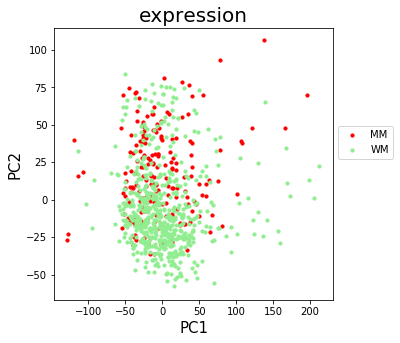

In [26]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 

targets = ['MM', 'WM']
colors = ['red', 'lightgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)
ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('expression', fontsize = 20)
#ax.grid()
#ax.set_xlim(-100, 100)
#ax.set_ylim(-100, 100)

plt.show()

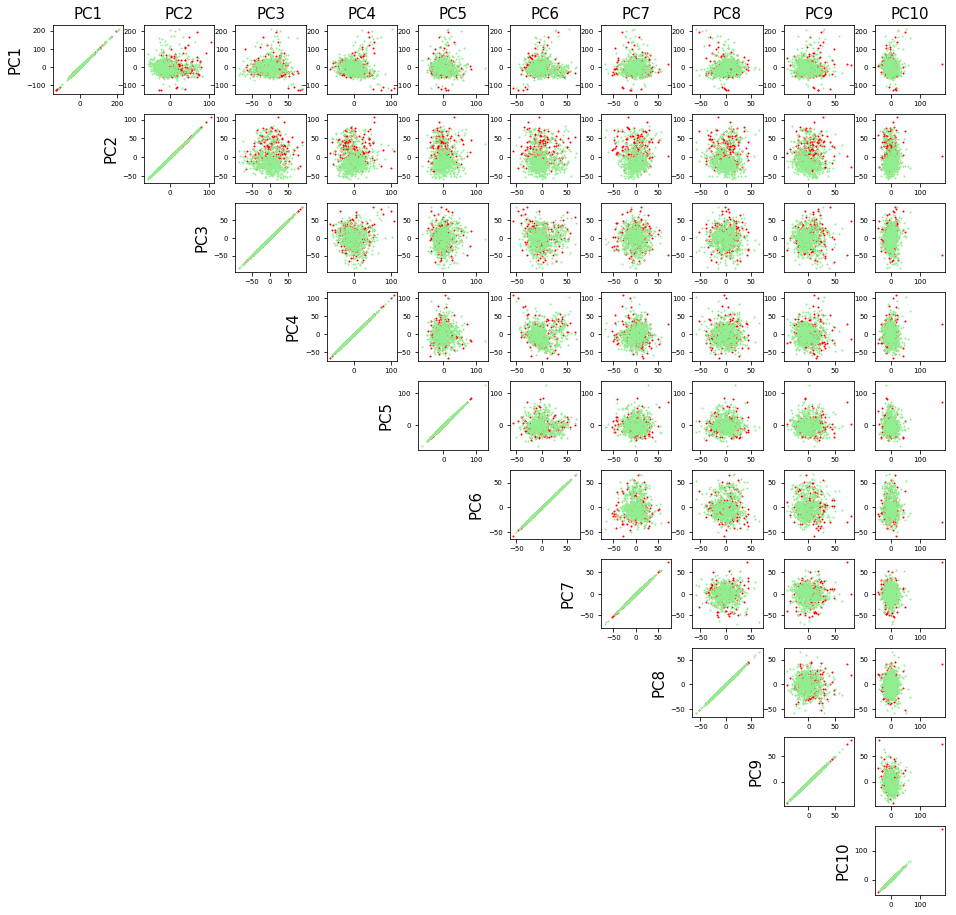

In [27]:
PClist = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10' ]

fig = plt.figure(figsize = (16,16))

for num1, PCnum1 in enumerate(PClist):
    for num2, PCnum2 in enumerate(PClist):

        
        
        if num2 >= num1:
            
            ax = fig.add_subplot(10,10,num2+1+10*num1) 

            targets = ['MM', 'WM']
            colors = ['red', 'lightgreen']
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf['Group'] == target
                ax.scatter(finalDf.loc[indicesToKeep, PCnum2]
                           , finalDf.loc[indicesToKeep, PCnum1]
                           , c = color
                           , s=1)
                ax.tick_params(labelsize=7)



                if num1+1 ==1:
                    ax.set_title(PCnum2, fontsize = 15)

                if num2 == num1:
                    ax.set_ylabel(PCnum1, fontsize = 15)

            subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.3, hspace=0.3)

            #ax.legend(targets, loc='lower left', bbox_to_anchor=(1, 0.5))
            #ax.set_xlabel(PCnum1, fontsize = 15)
            #ax.set_ylabel(PCnum2, fontsize = 15)
            #ax.set_title('expression', fontsize = 20)
            #ax.grid()
            #ax.set_xlim(-100, 100)
            #ax.set_ylim(-100, 100)

plt.show()

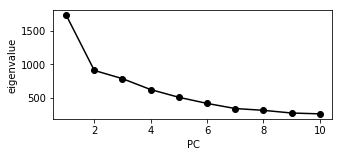

In [28]:
# eigenvalue
fig = plt.figure(figsize = (5,2))
ax = fig.add_subplot(1,1,1) 

ax.plot(range(1,11), eigenvalues, marker='o', c='k')

plt.ylabel('eigenvalue')
plt.xlabel('PC')
#plt.ylim([0, 3.5])
#plt.xlim([])

plt.show()

# t-Test

In [33]:
a = DF2[DF2['Group']=='MM']
b = DF2[DF2['Group']=='WM']

In [72]:
a

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,Sample ID,Group
MB-0891,9.05397,6.09347,5.25153,5.158,5.85508,9.28632,8.39676,5.26022,5.45831,6.11408,...,5.55745,7.78022,8.37798,5.40967,6.11952,5.23932,7.41776,5.38636,MB-0891,MM
MB-0434,7.96314,6.45881,5.49722,5.62351,5.91493,5.57278,8.35894,5.3355,5.76276,5.90685,...,5.46338,7.73154,8.56604,5.17555,6.41332,5.28054,8.07992,5.38291,MB-0434,MM
MB-0292,8.11237,5.96314,5.45152,5.21966,5.93067,5.6032,7.43358,5.40592,5.59674,6.3281,...,5.35884,8.2093,8.3222,5.43477,6.11322,5.0551,8.47924,5.09031,MB-0292,MM
MB-0666,8.20291,5.56671,5.454,5.22779,5.75107,5.31233,8.7632,5.30418,5.65773,6.97791,...,5.30404,8.3384,8.03902,5.22559,7.22896,5.36378,7.14977,5.17791,MB-0666,MM
MB-0598,8.29031,6.01106,5.59403,5.2076,5.86004,7.05328,8.31181,5.32599,5.53418,7.19916,...,5.54533,7.45311,8.16032,5.14635,6.47579,5.16576,6.96952,5.38041,MB-0598,MM
MB-0382,9.6029,7.04502,5.36167,5.40644,5.7881,6.0158,8.29992,5.40713,5.5778,6.20155,...,5.66881,7.13963,8.21056,5.3791,6.29042,5.07695,7.74275,5.30388,MB-0382,MM
MB-0215,8.56865,5.85112,5.23368,5.32116,5.56351,5.75122,8.29831,5.29673,5.491,5.87574,...,5.77454,7.45538,8.28625,5.39486,6.4804,5.31237,7.11584,5.47276,MB-0215,MM
MB-0306,9.17295,6.11221,5.53613,5.18904,5.4768,6.52319,8.97451,5.44893,5.48718,6.52798,...,5.33909,8.24308,8.44101,5.14568,6.03824,5.24754,6.78983,5.34011,MB-0306,MM
MB-0363,9.12157,6.48801,5.423,5.53764,5.85249,5.4505,8.42875,5.40201,5.54549,6.08274,...,5.82044,7.5053,8.45082,5.31662,6.19941,5.37339,6.9441,5.30667,MB-0363,MM
MB-0379,9.01042,5.71025,5.2894,5.3489,5.533,8.28828,8.88612,5.27348,5.42746,6.70873,...,5.23915,7.51207,7.86144,5.45734,5.83123,5.17431,7.24247,5.38543,MB-0379,MM


In [71]:
b

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,Sample ID,Group
MB-0362,8.67698,6.07533,5.45393,4.99452,5.83827,6.3975,7.90622,5.25946,5.70238,6.93074,...,5.68032,7.68849,8.08498,5.1618,6.35322,4.83648,7.30464,5.25184,MB-0362,WM
MB-0574,8.81486,5.62874,5.47194,5.31652,5.84943,6.11687,9.20638,5.39658,5.43913,6.4301,...,5.63225,7.74456,8.31002,5.78006,6.42405,5.19315,6.90365,5.09193,MB-0574,WM
MB-0899,8.64369,7.01022,5.47725,5.31312,5.88615,6.90679,7.83995,5.2988,5.59575,6.58553,...,5.57581,8.0048,8.29387,5.19478,6.48858,5.25428,7.06456,5.39198,MB-0899,WM
MB-0605,8.57613,6.05868,5.24566,5.158,6.03453,8.25508,8.09859,5.39102,5.61916,5.89402,...,5.3083,7.62832,8.25745,4.9627,6.25984,5.43332,6.82946,5.40522,MB-0605,WM
MB-0506,8.54905,5.51715,5.60048,5.28974,5.53294,5.20978,7.31616,5.12024,5.75519,6.8457,...,5.24426,7.8467,8.94368,5.30574,6.25011,5.34378,7.91056,5.3486,MB-0506,WM
MB-0223,9.47054,6.20376,5.48712,5.2679,5.87708,5.87547,8.60737,5.5356,5.42384,6.38062,...,5.59738,7.8537,8.01517,6.57516,6.67818,5.20011,6.09842,5.28194,MB-0223,WM
MB-0906,9.46458,5.8133,5.28148,5.24735,5.75858,8.04923,7.3122,5.29546,5.80362,6.8155,...,5.31329,8.32082,8.07227,5.39693,6.38011,5.17845,6.29781,5.36163,MB-0906,WM
MB-0249,8.49984,6.62512,5.32625,5.51951,5.62324,5.67541,7.67368,5.03934,5.57801,7.8173,...,5.55821,7.9095,8.46198,5.2646,6.01187,5.3009,7.45618,5.38231,MB-0249,WM
MB-0497,9.27137,5.86227,5.52873,5.38424,6.26786,6.9153,8.2475,5.30415,5.3998,5.72541,...,5.27928,7.73913,7.94151,5.43123,5.99623,5.07124,6.05949,5.46471,MB-0497,WM
MB-0143,8.45624,6.38223,5.22344,5.49825,5.99289,5.45834,8.42478,5.25455,5.81568,6.86629,...,5.30438,7.78757,9.00557,7.33131,6.27739,5.25081,8.02647,5.41571,MB-0143,WM


In [46]:
a.iloc[:,:-2].shape

(203, 24362)

In [41]:
t, p = ttest_ind(a.iloc[:,:-2].astype(float), b.iloc[:,:-2].astype(float), equal_var=False)

In [78]:
# m: difference (MM - WM)

m = a.mean(axis=0) - b.mean(axis=0)

In [79]:
SummaryDF = pd.DataFrame([t,p,m],columns=a.iloc[:,:-2].columns)

In [80]:
SummaryDF

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839
0,-3.681656,-0.877917,0.800939,0.286972,-7.359766e+00,-0.932743,-3.332132,0.765718,0.295471,3.944931,...,0.075515,1.555070,1.235202,1.331880,-0.781812,0.502598,-1.341191,-1.502739,0.653422,-0.169503
1,0.000270,0.380660,0.423683,0.774314,9.455889e-13,0.351587,0.000952,0.444316,0.767803,0.000098,...,0.939852,0.121051,0.217558,0.183847,0.434859,0.615575,0.180675,0.133916,0.513958,0.865499
2,-0.147797,-0.052129,0.008312,0.003219,-1.626774e-01,-0.086962,-0.110856,0.007568,0.003120,0.169914,...,0.000862,0.040527,0.015486,0.058538,-0.023735,0.014104,-0.029484,-0.017852,0.036437,-0.001853


In [89]:
x_val = SummaryDF.iloc[2,:]
y_val = -np.log10(SummaryDF.iloc[1,:])

In [98]:
x_val.abs() > 0.5

Hugo_Symbol
RERE           False
RNF165         False
CD049690       False
BC033982       False
PHF7           False
CIDEA          False
PAPD4          False
AI082173       False
SLC17A3        False
SDS            False
ATP6V1C2       False
F3             False
FAM71C         False
AK055082       False
BU687559       False
LIN52          False
PCOTH          False
GRM1           False
FXN            False
SLC9A1         False
PML            False
CR749394       False
CD164          False
DB337918       False
MOBKL2A        False
HGC6.1.1       False
OR1J2          False
GNG5           False
TAF15          False
EXTL3          False
               ...  
CA841087       False
ELANE          False
SHISA2         False
BCAT1          False
BU738502       False
NCKAP1L        False
TMEM146        False
AK098705       False
PSMC3IP        False
TEAD1          False
LOC253724      False
BM725158       False
GRHPR          False
RAB4B-EGLN2    False
TBC1D4         False
ANGPTL2        False
A

In [108]:
-np.log10(0.01)

2.0

In [186]:
#sel_1 = ((x_val.abs() >0.5) & (y_val>-np.log10(0.01)) & (y_val>(2.5/x_val) +2)    )
sel_1 = ( (y_val>(2.5/x_val) +2) & (x_val>0)   )
len(x_val[sel_1])

43

In [187]:
sel_2 = ( (y_val>(2.5/-x_val) +2) & (x_val<0)   )
len(x_val[sel_2])

142

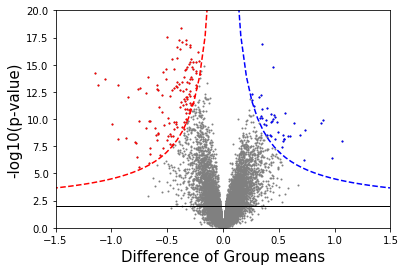

In [193]:
plt.scatter(x_val, y_val, s=1, c='grey')
plt.scatter(x_val[sel_1], y_val[sel_1], s=1, c='b')
plt.scatter(x_val[sel_2], y_val[sel_2], s=1, c='r')

plt.plot(np.arange(-2,2,0.1), 2*np.ones( len(np.arange(-2,2,0.1)) ), linewidth=1, color='k')
plt.plot(np.arange(0.01,2,0.05), 2.5/(np.arange(0.01,2,0.05))+2, linestyle='--', color='b')
plt.plot(-np.arange(0.01,2,0.05), 2.5/(np.arange(0.01,2,0.05))+2, linestyle='--', color='r')

ylim(0,20)
xlim(-1.5,1.5)
xlabel('Difference of Group means', fontsize=15)
ylabel('-log10(p-value)', fontsize=15)

plt.show()

In [190]:
# identify gene names
list(x_val[sel_2].index)

['TAF15',
 'AARSD1',
 'GLRB',
 'YPEL3',
 'AGTR1',
 'RABEP1',
 'COASY',
 'G6PC3',
 'VEZF1',
 'RAI1',
 'CDK5RAP3',
 'FBXO15',
 'RUNDC1',
 'STK32B',
 'IL17RB',
 'HEXIM2',
 'BTRC',
 'STC2',
 'CTF1',
 'LRRC48',
 'ACADVL',
 'C5',
 'TMEM101',
 'LRRN2',
 'GFRA1',
 'BECN1',
 'CAPN8',
 'ALDH3A2',
 'SUSD3',
 'MYH10',
 'KIAA1267',
 'ANKHD1',
 'CCDC56',
 'SGSM2',
 'TMPRSS6',
 'PIGV',
 'STAT3',
 'SORCS1',
 'IGFALS',
 'LRRC6',
 'CYBRD1',
 'RHOT1',
 'FAM38B',
 'KIAA0531',
 'BMPR1B',
 'MAPT',
 'CYB5D2',
 'MAP2K4',
 'ZBTB4',
 'PHYHD1',
 'CMYA5',
 'LRP2',
 'KIAA1407',
 'THNSL2',
 'LYPD6B',
 'ARSG',
 'ESR1',
 'CFB',
 'C17orf79',
 'NT5C3L',
 'MYL5',
 'TUBG2',
 'PLAT',
 'MST1',
 'CELSR2',
 'KLHDC9',
 'SORBS3',
 'CLIC6',
 'APH1B',
 'DCDC5',
 'IL6ST',
 'RGS11',
 'U79293',
 'C16orf93',
 'WNT3',
 'BCL2',
 'VAMP2',
 'DOC2A',
 'KCTD3',
 'ELP2',
 'ZNF500',
 'TMUB2',
 'BNIPL',
 'ZMYND10',
 'SYTL4',
 'MEIS3',
 'C17orf97',
 'PTPRT',
 'KAT2A',
 'RERG',
 'SALL2',
 'CHAD',
 'SUZ12',
 'NT5M',
 'P4HTM',
 'FLNB',
 'FGD3',


In [156]:
np.arrange(0,2,0.05)

AttributeError: module 'numpy' has no attribute 'arrange'

In [123]:
np.arange(0,1,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [116]:
plt.plot(range(100)/100, 10/(range(100)/100))
plt.show()

TypeError: unsupported operand type(s) for /: 'range' and 'int'